In [1]:
from encryptor import Encryptor
from vigenere_hacker import VigenereHacker, kasiski_method
from hasher import Hasher

In [2]:
from random import randint
def generate_key(length):
    return ''.join([chr(randint(ord('a'), ord('z'))) for _ in range(length)])

In [3]:
with open('rus_text.txt', 'r') as test:
    text = test.read()
print(text)

Одним из методов определения длины ключевого слова, использованного при шифровании текста по методу Виженера, является метод Касиски.
Данный метод основан на предположении, что наличие повторяющихся  -грамм (-символьных последовательностей) в зашифрованном тексте будет в большинстве случаев обусловлено наличием соответствующих повторяющихся -грамм в исходном тексте. Предполагается, что случайное появление в шифротексте повторяющихся -грамм маловероятно.



In [4]:
encryptor = Encryptor("абвг", lang='rus')
encrypted = encryptor.encrypt(text)
print(encrypted)

Оеплм кк нзхоере псуеезоеокв енлнь нлящивпес тнсвб, итсслэйсвбпродр пск шйцуогврий хелуха сс нзхоех Вйиинжтг, белазхса пеурз Лвфитмл.
Жгноэм нзхое ссореао ра суеесслпиинйк, шфс овоишки рретптвюъкшса  -дтгмн (-ткпвпняньч ппуоеереаузоьорфтжл) г кащкчрпдгнорп узнсуз бфжит д бпняшйпфтгз смхъажд овхфлпдоеор нбнлчйзп трстгзхсудцюъкш рретптвюъкшса -гсвпм д итчсдорп узнсуз. Ртидрроадвиттб, шфс тнцчблрож тоадоеоки г ыихтстжмфтж тогфсрааьицув -еуано мбнсвжтсяупс.



In [5]:
hasher = Hasher(encrypted)
lengths = kasiski_method(hasher, 3)
print(lengths.most_common(10))
hacker = VigenereHacker('rus')
for length, _ in filter(lambda x: 3 < x[0] < len(encrypted), lengths.most_common(5)):
    if length != 4:
        continue
    for decrypted in hacker.hack(encrypted, length):
        if decrypted == text:
            print("code word length = {}".format(length))
            print(decrypted)
            break

[(1, 331), (2, 68), (4, 68), (3, 41), (6, 38), (12, 38), (8, 37), (16, 21), (24, 19), (48, 16)]
code word length = 4
Одним из методов определения длины ключевого слова, использованного при шифровании текста по методу Виженера, является метод Касиски.
Данный метод основан на предположении, что наличие повторяющихся  -грамм (-символьных последовательностей) в зашифрованном тексте будет в большинстве случаев обусловлено наличием соответствующих повторяющихся -грамм в исходном тексте. Предполагается, что случайное появление в шифротексте повторяющихся -грамм маловероятно.



In [6]:
from collections import defaultdict

with open('text.txt', 'r') as test:
    text = test.read()
answers = defaultdict(lambda: defaultdict(int))
for _ in range(3):
    for key_length in range(4, 20, 2):
        key = generate_key(key_length)
        for i in range(10, 1000, 100):
            if i < key_length:
                answers[key_length][i] += 1
                continue
            print("trying with key length = {} and text length = {}".format(key_length, i))
            encryptor = Encryptor(key)
            encrypted = encryptor.encrypt(text[:i])
            hasher = Hasher(encrypted)
            l = 2 if i < 250 else 3 if i < 5000 else 5 if i < 20000 else 10
            lengths = kasiski_method(hasher, l)
            print(lengths)
            hacker = VigenereHacker()
            results = []
            for length, _ in filter(lambda x: 3 < x[0] < len(encrypted) // 2, lengths.most_common(7)):
                print(length)
                if length != key_length:
                    continue
                local_results = [decrypted == text[:i] for decrypted in hacker.hack(encrypted, length)]
                results.append(any(local_results))
                if results[-1]:
                    print("good length: {}!".format(length))
                    break
            answers[key_length][i] += 0 if any(results) else 1
            print(100 * "*")

trying with key length = 4 and text length = 10
Counter({1: 9})
****************************************************************************************************
trying with key length = 4 and text length = 110
Counter({1: 85, 2: 11, 4: 6, 5: 4, 8: 4, 10: 3, 7: 3, 14: 3, 3: 3, 28: 2, 56: 2, 16: 2, 32: 2, 64: 2, 6: 2, 9: 2, 37: 2, 25: 1, 50: 1, 18: 1, 27: 1, 54: 1, 35: 1, 70: 1, 12: 1, 15: 1, 45: 1, 41: 1})
4
good length: 4!
****************************************************************************************************
trying with key length = 4 and text length = 210
Counter({1: 132, 2: 36, 4: 27, 5: 11, 3: 11, 8: 10, 10: 9, 19: 9, 38: 9, 76: 9, 6: 8, 16: 6, 9: 6, 12: 6, 20: 6, 7: 4, 14: 4, 18: 4, 32: 3, 15: 3, 40: 3, 80: 3, 25: 2, 50: 2, 28: 2, 56: 2, 64: 2, 37: 2, 41: 2, 24: 2, 36: 2, 30: 2, 60: 2, 17: 2, 27: 1, 54: 1, 13: 1, 26: 1, 91: 1, 182: 1, 35: 1, 70: 1, 31: 1, 62: 1, 124: 1, 45: 1, 113: 1, 100: 1, 61: 1, 122: 1, 72: 1, 47: 1, 127: 1, 82: 1, 85: 1, 51: 1})
4
good length

****************************************************************************************************
trying with key length = 6 and text length = 310
Counter({1: 282, 3: 13, 2: 12, 6: 12, 5: 9, 10: 9, 15: 9, 30: 9, 25: 8, 50: 8, 75: 8, 150: 8, 9: 4, 18: 3, 4: 2, 12: 2, 8: 1, 24: 1, 27: 1, 36: 1, 54: 1, 72: 1, 108: 1, 216: 1, 20: 1, 60: 1, 11: 1, 33: 1, 99: 1})
6
good length: 6!
****************************************************************************************************
trying with key length = 6 and text length = 410
Counter({1: 356, 3: 38, 2: 36, 6: 36, 9: 14, 4: 13, 12: 13, 18: 13, 8: 12, 24: 12, 36: 11, 72: 11, 5: 11, 10: 11, 15: 11, 30: 11, 7: 11, 14: 11, 21: 11, 42: 11, 16: 10, 48: 10, 144: 10, 25: 8, 50: 8, 75: 8, 150: 8, 49: 8, 98: 8, 147: 8, 294: 8, 41: 2, 82: 2, 123: 2, 246: 2, 11: 2, 33: 2, 35: 2, 70: 2, 105: 2, 210: 2, 32: 1, 96: 1, 288: 1, 89: 1, 267: 1, 27: 1, 54: 1, 108: 1, 216: 1, 20: 1, 60: 1, 99: 1, 28: 1, 56: 1, 84: 1, 168: 1, 22: 1, 66: 1})
6
good length: 6!


4
8
good length: 8!
****************************************************************************************************
trying with key length = 8 and text length = 510
Counter({1: 418, 2: 39, 4: 38, 8: 38, 16: 32, 3: 16, 7: 15, 6: 13, 9: 12, 12: 12, 18: 12, 24: 12, 14: 11, 28: 11, 56: 11, 36: 11, 72: 11, 112: 10, 48: 10, 144: 10, 17: 8, 34: 8, 68: 8, 136: 8, 272: 8, 32: 4, 5: 4, 37: 3, 64: 2, 11: 2, 21: 2, 74: 2, 148: 2, 296: 2, 10: 2, 20: 2, 40: 2, 80: 2, 19: 2, 33: 1, 77: 1, 231: 1, 13: 1, 35: 1, 65: 1, 91: 1, 455: 1, 224: 1, 96: 1, 288: 1, 27: 1, 54: 1, 108: 1, 216: 1, 23: 1, 46: 1, 92: 1, 184: 1, 67: 1, 49: 1, 343: 1, 25: 1, 125: 1, 397: 1, 31: 1, 62: 1, 124: 1, 248: 1, 42: 1, 84: 1, 168: 1, 128: 1, 256: 1, 107: 1, 321: 1, 209: 1, 111: 1, 53: 1, 181: 1, 133: 1})
4
8
good length: 8!
****************************************************************************************************
trying with key length = 8 and text length = 610
Counter({1: 502, 2: 46, 4: 44, 8: 44, 16: 33, 7: 18

****************************************************************************************************
trying with key length = 12 and text length = 610
Counter({1: 566, 3: 20, 2: 16, 4: 15, 6: 15, 8: 14, 12: 14, 24: 13, 9: 12, 16: 12, 18: 11, 36: 11, 48: 11, 72: 11, 144: 10, 7: 3, 27: 2, 149: 2, 447: 2, 14: 2, 28: 2, 56: 2, 21: 2, 32: 1, 96: 1, 288: 1, 54: 1, 108: 1, 216: 1, 5: 1, 10: 1, 15: 1, 20: 1, 30: 1, 60: 1, 67: 1, 201: 1, 112: 1, 42: 1, 84: 1, 168: 1, 31: 1, 62: 1, 93: 1, 186: 1})
4
6
8
12
good length: 12!
****************************************************************************************************
trying with key length = 12 and text length = 710
Counter({1: 613, 3: 46, 2: 43, 4: 41, 6: 41, 12: 40, 9: 27, 18: 26, 36: 26, 8: 23, 24: 22, 27: 13, 16: 12, 72: 12, 54: 12, 108: 12, 5: 12, 10: 12, 15: 12, 20: 12, 30: 12, 60: 12, 48: 11, 45: 11, 90: 11, 135: 11, 180: 11, 270: 11, 540: 11, 144: 10, 23: 8, 46: 8, 69: 8, 92: 8, 138: 8, 184: 8, 276: 8, 552: 8, 7: 5, 14: 4, 21: 4, 28

trying with key length = 16 and text length = 810
Counter({1: 683, 2: 59, 4: 54, 8: 50, 16: 48, 32: 18, 3: 16, 6: 13, 64: 12, 7: 12, 12: 11, 24: 11, 48: 11, 14: 11, 28: 11, 56: 11, 9: 10, 18: 10, 36: 10, 72: 10, 144: 10, 112: 10, 17: 9, 34: 9, 11: 8, 22: 8, 44: 8, 88: 8, 176: 8, 352: 8, 704: 8, 68: 8, 136: 8, 272: 8, 5: 5, 10: 4, 19: 3, 38: 3, 76: 3, 128: 3, 256: 3, 37: 3, 20: 3, 40: 3, 29: 3, 74: 2, 148: 2, 80: 2, 127: 2, 254: 2, 152: 2, 304: 2, 608: 2, 87: 2, 61: 2, 13: 2, 26: 2, 52: 2, 104: 2, 208: 2, 416: 2, 96: 1, 288: 1, 51: 1, 102: 1, 47: 1, 94: 1, 188: 1, 376: 1, 83: 1, 166: 1, 332: 1, 296: 1, 592: 1, 508: 1, 431: 1, 547: 1, 15: 1, 145: 1, 435: 1, 25: 1, 50: 1, 111: 1, 224: 1, 131: 1, 262: 1, 35: 1, 70: 1, 140: 1, 280: 1, 58: 1, 174: 1, 203: 1, 183: 1, 43: 1})
4
8
16
good length: 16!
****************************************************************************************************
trying with key length = 16 and text length = 910
Counter({1: 762, 2: 70, 4: 60, 8: 56, 16: 53, 

trying with key length = 4 and text length = 410
Counter({1: 320, 2: 59, 4: 59, 8: 29, 16: 23, 3: 13, 6: 13, 12: 13, 24: 12, 9: 11, 18: 11, 36: 11, 72: 11, 48: 10, 144: 10, 7: 10, 14: 10, 28: 10, 56: 10, 29: 10, 58: 10, 116: 10, 112: 9, 19: 8, 38: 8, 76: 8, 47: 8, 94: 8, 188: 8, 32: 3, 37: 3, 74: 3, 148: 3, 5: 3, 10: 3, 20: 3, 64: 2, 296: 2, 79: 2, 158: 2, 316: 2, 40: 2, 80: 2, 96: 1, 288: 1, 27: 1, 54: 1, 108: 1, 216: 1, 23: 1, 46: 1, 92: 1, 184: 1, 15: 1, 30: 1, 60: 1, 128: 1, 256: 1, 31: 1, 62: 1, 124: 1, 248: 1, 21: 1, 42: 1, 84: 1, 168: 1})
4
good length: 4!
****************************************************************************************************
trying with key length = 4 and text length = 510
Counter({1: 385, 2: 88, 4: 88, 8: 38, 16: 32, 29: 19, 58: 19, 116: 19, 5: 14, 3: 13, 6: 13, 12: 13, 7: 13, 24: 12, 10: 12, 20: 12, 14: 12, 28: 12, 9: 11, 18: 11, 36: 11, 72: 11, 56: 11, 48: 10, 144: 10, 112: 10, 19: 9, 13: 9, 26: 9, 52: 9, 65: 9, 130: 9, 260: 9, 38: 8, 76: 8, 47:

good length: 6!
****************************************************************************************************
trying with key length = 6 and text length = 810
Counter({1: 616, 2: 132, 3: 122, 6: 118, 5: 47, 4: 46, 10: 44, 15: 43, 30: 43, 12: 42, 7: 32, 9: 31, 18: 30, 14: 28, 21: 28, 36: 27, 42: 27, 8: 25, 24: 24, 11: 19, 22: 19, 49: 18, 98: 18, 147: 18, 294: 18, 33: 17, 66: 17, 55: 16, 110: 16, 165: 16, 330: 16, 27: 14, 20: 14, 60: 14, 72: 13, 54: 13, 45: 13, 90: 13, 16: 12, 108: 12, 135: 12, 180: 12, 270: 12, 48: 11, 540: 11, 144: 10, 43: 10, 86: 10, 129: 10, 258: 10, 67: 9, 134: 9, 201: 9, 402: 9, 25: 8, 50: 8, 75: 8, 150: 8, 23: 8, 46: 8, 69: 8, 92: 8, 138: 8, 184: 8, 276: 8, 552: 8, 17: 5, 19: 4, 34: 4, 68: 4, 28: 4, 13: 4, 51: 4, 53: 3, 56: 3, 35: 3, 70: 3, 105: 3, 210: 3, 84: 3, 26: 3, 39: 3, 102: 3, 204: 3, 265: 2, 41: 2, 82: 2, 123: 2, 246: 2, 563: 2, 63: 2, 126: 2, 168: 2, 252: 2, 78: 2, 431: 2, 127: 2, 254: 2, 40: 2, 120: 2, 29: 1, 58: 1, 293: 1, 586: 1, 38: 1, 209: 1,

good length: 10!
****************************************************************************************************
trying with key length = 10 and text length = 210
Counter({1: 147, 2: 26, 3: 16, 5: 15, 10: 13, 4: 12, 6: 10, 15: 8, 30: 7, 9: 6, 25: 6, 20: 6, 50: 5, 8: 5, 16: 4, 18: 4, 75: 4, 27: 3, 11: 3, 22: 3, 150: 3, 12: 3, 40: 3, 80: 3, 19: 3, 54: 2, 13: 2, 26: 2, 23: 2, 60: 2, 32: 1, 64: 1, 113: 1, 45: 1, 90: 1, 101: 1, 100: 1, 61: 1, 122: 1, 41: 1, 123: 1, 31: 1, 53: 1, 106: 1, 37: 1, 111: 1, 57: 1, 52: 1, 104: 1, 36: 1, 108: 1, 83: 1, 38: 1, 76: 1, 44: 1, 7: 1})
5
10
good length: 10!
****************************************************************************************************
trying with key length = 10 and text length = 310
Counter({1: 278, 2: 13, 5: 12, 10: 12, 3: 9, 6: 9, 15: 9, 30: 9, 25: 8, 50: 8, 75: 8, 150: 8, 4: 3, 20: 3, 23: 2, 8: 2, 16: 2, 40: 2, 80: 2, 211: 1, 11: 1, 22: 1, 46: 1, 115: 1, 230: 1, 12: 1, 60: 1})
5
10
good length: 10!
*************************

good length: 12!
****************************************************************************************************
trying with key length = 12 and text length = 510
Counter({1: 470, 2: 16, 3: 15, 4: 13, 6: 13, 12: 13, 8: 12, 9: 12, 24: 12, 18: 11, 36: 11, 72: 11, 16: 10, 48: 10, 144: 10, 5: 3, 10: 3, 27: 2, 25: 2, 50: 2, 32: 1, 96: 1, 288: 1, 54: 1, 108: 1, 216: 1, 15: 1, 20: 1, 30: 1, 60: 1, 37: 1, 111: 1, 103: 1, 206: 1, 11: 1, 33: 1, 99: 1, 297: 1, 7: 1, 14: 1, 21: 1, 28: 1, 42: 1, 56: 1, 84: 1, 168: 1, 43: 1})
4
6
12
good length: 12!
****************************************************************************************************
trying with key length = 12 and text length = 610
Counter({1: 554, 2: 21, 3: 18, 4: 15, 6: 15, 12: 14, 8: 13, 24: 13, 9: 12, 16: 11, 18: 11, 36: 11, 48: 11, 72: 11, 144: 10, 7: 5, 5: 3, 10: 3, 11: 3, 27: 2, 103: 2, 33: 2, 14: 2, 25: 2, 50: 2, 22: 2, 277: 2, 73: 1, 511: 1, 32: 1, 96: 1, 288: 1, 54: 1, 108: 1, 216: 1, 79: 1, 553: 1, 15: 1, 20: 1, 30: 1

****************************************************************************************************
trying with key length = 16 and text length = 210
Counter({1: 169, 2: 22, 4: 13, 5: 9, 10: 8, 8: 8, 3: 7, 16: 6, 20: 6, 9: 5, 6: 5, 40: 5, 18: 4, 7: 4, 32: 3, 80: 3, 64: 2, 14: 2, 149: 2, 12: 2, 25: 1, 50: 1, 13: 1, 39: 1, 117: 1, 27: 1, 54: 1, 19: 1, 133: 1, 43: 1, 86: 1, 83: 1, 166: 1, 49: 1, 98: 1, 17: 1, 51: 1, 61: 1, 122: 1, 21: 1, 42: 1, 63: 1, 126: 1, 23: 1, 115: 1, 53: 1, 15: 1, 30: 1, 60: 1, 11: 1, 22: 1, 44: 1, 36: 1})
4
5
10
8
****************************************************************************************************
trying with key length = 16 and text length = 310
Counter({1: 284, 2: 12, 4: 12, 8: 12, 16: 12, 7: 9, 14: 9, 28: 9, 56: 9, 112: 9, 5: 2, 10: 2, 20: 2, 40: 2, 80: 2, 32: 1, 64: 1})
4
8
16
7
14
****************************************************************************************************
trying with key length = 16 and text length = 410
Counter({1: 3

good length: 4!
****************************************************************************************************
trying with key length = 4 and text length = 610
Counter({1: 470, 2: 96, 4: 96, 8: 44, 16: 33, 29: 19, 58: 19, 116: 19, 7: 16, 14: 15, 28: 15, 3: 14, 6: 14, 12: 14, 56: 14, 24: 13, 5: 13, 10: 13, 20: 13, 9: 11, 18: 11, 36: 11, 48: 11, 72: 11, 144: 10, 13: 10, 26: 10, 52: 10, 65: 10, 130: 10, 260: 10, 112: 10, 19: 9, 38: 9, 76: 9, 47: 8, 94: 8, 188: 8, 17: 8, 34: 8, 68: 8, 136: 8, 272: 8, 32: 4, 49: 4, 98: 4, 196: 4, 40: 3, 37: 3, 74: 3, 148: 3, 392: 3, 64: 2, 137: 2, 274: 2, 548: 2, 296: 2, 79: 2, 158: 2, 316: 2, 80: 2, 96: 1, 288: 1, 104: 1, 520: 1, 27: 1, 54: 1, 108: 1, 216: 1, 23: 1, 46: 1, 92: 1, 184: 1, 11: 1, 77: 1, 15: 1, 30: 1, 60: 1, 128: 1, 256: 1, 31: 1, 62: 1, 124: 1, 248: 1, 21: 1, 42: 1, 84: 1, 168: 1, 173: 1, 61: 1, 73: 1, 146: 1, 292: 1, 224: 1, 152: 1})
4
good length: 4!
************************************************************************************

Counter({1: 639, 2: 95, 4: 90, 8: 88, 16: 48, 3: 28, 6: 24, 12: 24, 24: 24, 32: 18, 7: 18, 14: 16, 19: 15, 28: 15, 56: 15, 9: 14, 38: 14, 76: 14, 152: 14, 18: 13, 36: 13, 72: 13, 64: 12, 48: 11, 144: 10, 11: 10, 112: 10, 23: 9, 46: 9, 92: 9, 184: 9, 22: 9, 69: 8, 138: 8, 276: 8, 552: 8, 44: 8, 88: 8, 176: 8, 352: 8, 704: 8, 17: 8, 34: 8, 68: 8, 136: 8, 272: 8, 5: 7, 10: 6, 20: 5, 40: 5, 73: 5, 146: 5, 13: 4, 37: 4, 292: 4, 584: 4, 26: 3, 52: 3, 104: 3, 74: 3, 148: 3, 296: 3, 21: 3, 53: 3, 106: 3, 212: 3, 424: 3, 128: 3, 256: 3, 49: 3, 98: 3, 196: 3, 392: 3, 80: 2, 31: 2, 62: 2, 124: 2, 42: 2, 63: 2, 84: 2, 168: 2, 304: 2, 608: 2, 208: 2, 416: 2, 35: 2, 15: 2, 30: 2, 60: 2, 120: 2, 96: 1, 288: 1, 65: 1, 130: 1, 260: 1, 520: 1, 27: 1, 54: 1, 108: 1, 216: 1, 691: 1, 592: 1, 248: 1, 126: 1, 252: 1, 504: 1, 57: 1, 224: 1, 43: 1, 86: 1, 172: 1, 143: 1, 173: 1, 346: 1, 70: 1, 163: 1, 326: 1, 45: 1, 90: 1, 180: 1, 360: 1, 25: 1, 175: 1, 111: 1, 47: 1, 141: 1})
4
8
good length: 8!
*************

trying with key length = 12 and text length = 710
Counter({1: 611, 2: 45, 3: 43, 6: 41, 4: 40, 12: 40, 9: 27, 18: 26, 36: 26, 8: 22, 24: 22, 27: 13, 5: 13, 10: 13, 72: 12, 54: 12, 108: 12, 15: 12, 20: 12, 30: 12, 60: 12, 16: 11, 48: 11, 45: 11, 90: 11, 135: 11, 180: 11, 270: 11, 540: 11, 144: 10, 23: 8, 46: 8, 69: 8, 92: 8, 138: 8, 184: 8, 276: 8, 552: 8, 7: 4, 14: 4, 21: 3, 28: 3, 42: 3, 84: 3, 17: 3, 34: 3, 51: 3, 68: 3, 102: 3, 204: 3, 56: 2, 63: 2, 126: 2, 168: 2, 252: 2, 41: 2, 49: 1, 98: 1, 343: 1, 686: 1, 181: 1, 543: 1, 32: 1, 96: 1, 288: 1, 216: 1, 504: 1, 82: 1, 11: 1, 451: 1, 73: 1, 146: 1, 367: 1, 139: 1, 43: 1, 86: 1, 129: 1, 258: 1})
6
4
12
good length: 12!
****************************************************************************************************
trying with key length = 12 and text length = 810
Counter({1: 699, 2: 48, 3: 46, 6: 44, 4: 42, 12: 42, 9: 29, 18: 28, 36: 27, 8: 24, 24: 24, 5: 18, 10: 16, 15: 15, 30: 15, 20: 14, 60: 14, 72: 13, 27: 13, 45: 13, 90: 13,

****************************************************************************************************
trying with key length = 16 and text length = 410
Counter({1: 357, 2: 23, 4: 23, 8: 23, 16: 23, 3: 13, 6: 10, 9: 10, 12: 10, 18: 10, 24: 10, 36: 10, 48: 10, 72: 10, 144: 10, 7: 9, 14: 9, 28: 9, 56: 9, 112: 9, 32: 3, 64: 2, 5: 2, 10: 2, 20: 2, 40: 2, 80: 2, 37: 2, 111: 2, 96: 1, 288: 1, 128: 1, 256: 1, 113: 1, 11: 1, 33: 1})
4
8
16
good length: 16!
****************************************************************************************************
trying with key length = 16 and text length = 510
Counter({1: 437, 2: 33, 4: 33, 8: 32, 16: 32, 3: 15, 6: 11, 9: 11, 12: 11, 18: 11, 36: 11, 24: 10, 48: 10, 72: 10, 144: 10, 7: 10, 14: 10, 28: 10, 56: 10, 112: 10, 17: 8, 34: 8, 68: 8, 136: 8, 272: 8, 32: 4, 64: 2, 5: 2, 10: 2, 20: 2, 40: 2, 80: 2, 11: 2, 37: 2, 111: 2, 96: 1, 288: 1, 128: 1, 256: 1, 113: 1, 337: 1, 224: 1, 107: 1, 321: 1, 19: 1, 209: 1, 33: 1})
4
8
16
good length: 16!
*********

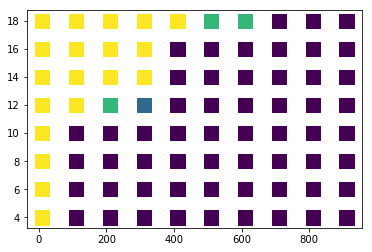

In [7]:
from matplotlib import pyplot as plt

x = []
y = []
c = []

for key_length, by_lengths in answers.items():
    for length, value in by_lengths.items():
        x.append(length)
        y.append(key_length)
        c.append(value)
        
plt.scatter(x=x, y=y, c=c, marker='s', s=200)
plt.show()